# Project: Problem Statement - Personal Loan Campaign Modelling
## Thera Bank Personal Loan Campaign
 
## Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

 

## Domain:
Banking

 

## Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

## Attribute Information:
* ID: Customer ID
* Age: Customer's age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer 
* ZIP Code: Home Address ZIP
* Family: Family size of the customer
* CCAvg: Avg. spending on credit cards per month 
* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage: Value of house mortgage if any. 
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?
 
## Learning Outcomes:
* Exploratory Data Analysis
* Preparing the data to train a model
Training and making predictions using a classification model
* Model evaluation
 

## Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

 

## Steps and tasks:
* Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)
* EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
Number of unique in each column?
Number of people with zero mortgage?
Number of people with zero credit card spending per month?
Value counts of all categorical columns.
Univariate and Bivariate
Get data model ready
* Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
* Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to  display confusion matrix (15 marks)
* Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)
* Give conclusion related to the Business understanding of your model? (5 marks)

In [ ]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set(color_codes=True) 
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score,classification_report, roc_curve
from sklearn.preprocessing import MinMaxScaler,StandardScaler,robust_scale
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
data = pd.read_csv('loan.csv')   

>-->**Univariate Analysis**

In [4]:
data = data.rename(columns = {'ZIP Code': 'ZipCode', 'Personal Loan':'PersonalLoan', 'Securities Account':'SecuritiesAccount',
                             'CD Account':'CDAccount'},  inplace = False)

In [5]:
data.head()

,ID,Age,Experience,Income,ZipCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZipCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
data.shape

(5000, 14)

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
data.isnull().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZipCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [10]:
# Number of unique values in a column
data.nunique()

ID                   5000
Age                    45
Experience             47
Income                162
ZipCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
PersonalLoan            2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

In [11]:
data2 = data.Mortgage[data.Mortgage == 0].count()

In [12]:
# Number of people with zero mortgage
print(data2)

3462


In [13]:
data3 = data.CCAvg[data.CCAvg == 0].count()

In [14]:
#Number of people with zero credit card spending per month
print(data3)
print()

106



In [15]:
# Value counts of numeric variables:

for i in list(data.columns[data.dtypes=='int64']):  
    print(i)
    print(data[i].value_counts().sort_index().head())
    print()

ID
1    1
2    1
3    1
4    1
5    1
Name: ID, dtype: int64

Age
23    12
24    28
25    53
26    78
27    91
Name: Age, dtype: int64

Experience
-3     4
-2    15
-1    33
 0    66
 1    74
Name: Experience, dtype: int64

Income
8     23
9     26
10    23
11    27
12    30
Name: Income, dtype: int64

ZipCode
9307     1
90005    5
90007    6
90009    8
90011    3
Name: ZipCode, dtype: int64

Family
1    1472
2    1296
3    1010
4    1222
Name: Family, dtype: int64

Education
1    2096
2    1403
3    1501
Name: Education, dtype: int64

Mortgage
0     3462
75       8
76      12
77       4
78      15
Name: Mortgage, dtype: int64

PersonalLoan
0    4520
1     480
Name: PersonalLoan, dtype: int64

SecuritiesAccount
0    4478
1     522
Name: SecuritiesAccount, dtype: int64

CDAccount
0    4698
1     302
Name: CDAccount, dtype: int64

Online
0    2016
1    2984
Name: Online, dtype: int64

CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64



In [156]:
# Value counts for categorical variables

for i in list(data.columns[data.dtypes=='category']):  
    print(i)
    print(data[i].value_counts().sort_index().head())
    print()

PersonalLoan
0    4520
1     480
Name: PersonalLoan, dtype: int64

SecuritiesAccount
0    4478
1     522
Name: SecuritiesAccount, dtype: int64

CDAccount
0    4698
1     302
Name: CDAccount, dtype: int64

Online
0    2016
1    2984
Name: Online, dtype: int64

CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64



In [157]:
# Normalized value counts of numeric variables shown as a percent:

coun

Age
23    0.24
24    0.56
25    1.06
26    1.56
27    1.82
Name: Age, dtype: float64

Experience
-3    0.08
-2    0.30
-1    0.66
 0    1.32
 1    1.48
Name: Experience, dtype: float64

Income
8     0.46
9     0.52
10    0.46
11    0.54
12    0.60
Name: Income, dtype: float64

ZipCode
9307     0.02
90005    0.10
90007    0.12
90009    0.16
90011    0.06
Name: ZipCode, dtype: float64

Family
1    29.44
2    25.92
3    20.20
4    24.44
Name: Family, dtype: float64

Education
1    41.92
2    28.06
3    30.02
Name: Education, dtype: float64

Mortgage
0     69.24
75     0.16
76     0.24
77     0.08
78     0.30
Name: Mortgage, dtype: float64



In [18]:
data.CCAvg.value_counts(normalize=True).sort_index().head()*100

0.0    2.12
0.1    3.66
0.2    4.08
0.3    4.82
0.4    3.58
Name: CCAvg, dtype: float64

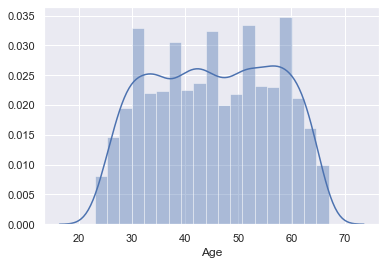

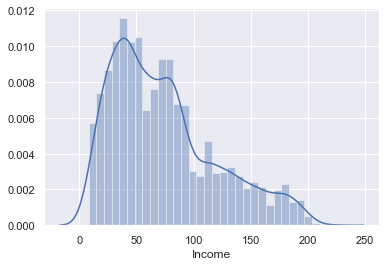

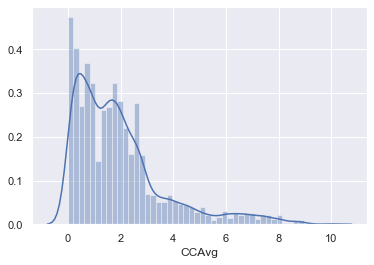

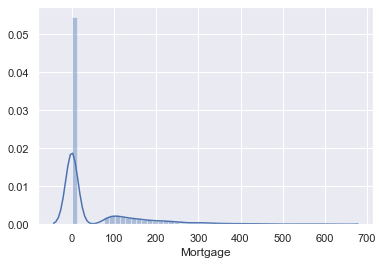

In [19]:
#distplot for continuous variables
for i in ['Age','Income','CCAvg','Mortgage']:
    sns.distplot(data[i])
    plt.show()

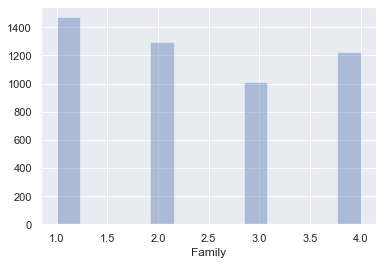

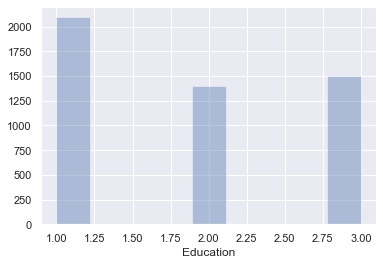

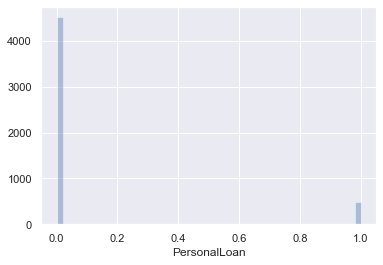

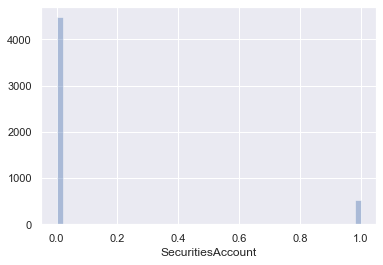

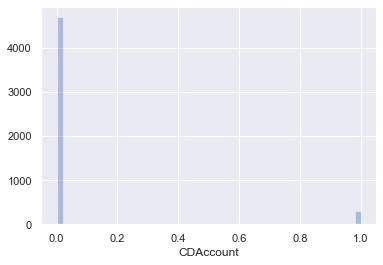

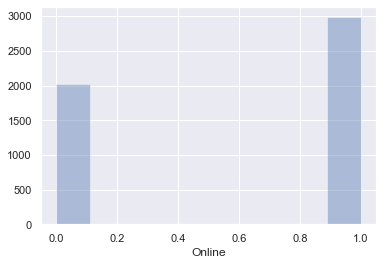

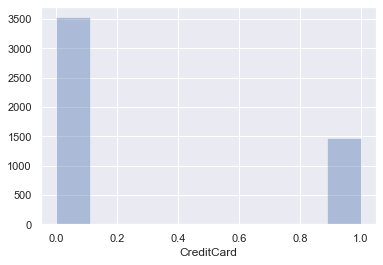

In [20]:
# histogram for categorical variables
for i in ['Family','Education','PersonalLoan','SecuritiesAccount','CDAccount','Online','CreditCard']:
    sns.distplot(data[i],kde=False)
    plt.show()

In [21]:
# Removing ID column, has no value in the regression

data.drop(['ID'], axis=1, inplace=True)

In [22]:
# Converting variables to categorical variables where relevant

data['PersonalLoan'] = data['PersonalLoan'].astype('category')

In [23]:
data['SecuritiesAccount'] = data['SecuritiesAccount'].astype('category')

In [24]:
data['CDAccount'] = data['CDAccount'].astype('category')

In [25]:
data['Online'] = data['Online'].astype('category')

In [26]:
data['CreditCard'] = data['CreditCard'].astype('category')

In [27]:
data.dtypes

Age                     int64
Experience              int64
Income                  int64
ZipCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
PersonalLoan         category
SecuritiesAccount    category
CDAccount            category
Online               category
CreditCard           category
dtype: object

In [28]:
# Normalized value counts of categorical columns shown as percentages:
for i in list(data.columns[data.dtypes=='category']):  
    print(i)
    print(data[i].value_counts(normalize=True)*100)
    print()

PersonalLoan
0    90.4
1     9.6
Name: PersonalLoan, dtype: float64

SecuritiesAccount
0    89.56
1    10.44
Name: SecuritiesAccount, dtype: float64

CDAccount
0    93.96
1     6.04
Name: CDAccount, dtype: float64

Online
1    59.68
0    40.32
Name: Online, dtype: float64

CreditCard
0    70.6
1    29.4
Name: CreditCard, dtype: float64



>-->**Bivariate Analysis**

In [29]:
#data.groupby(['PersonalLoan','SecuritiesAccount','Experience','Family'])['CreditCard'].value_counts()

In [30]:
data.head()

,Age,Experience,Income,ZipCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


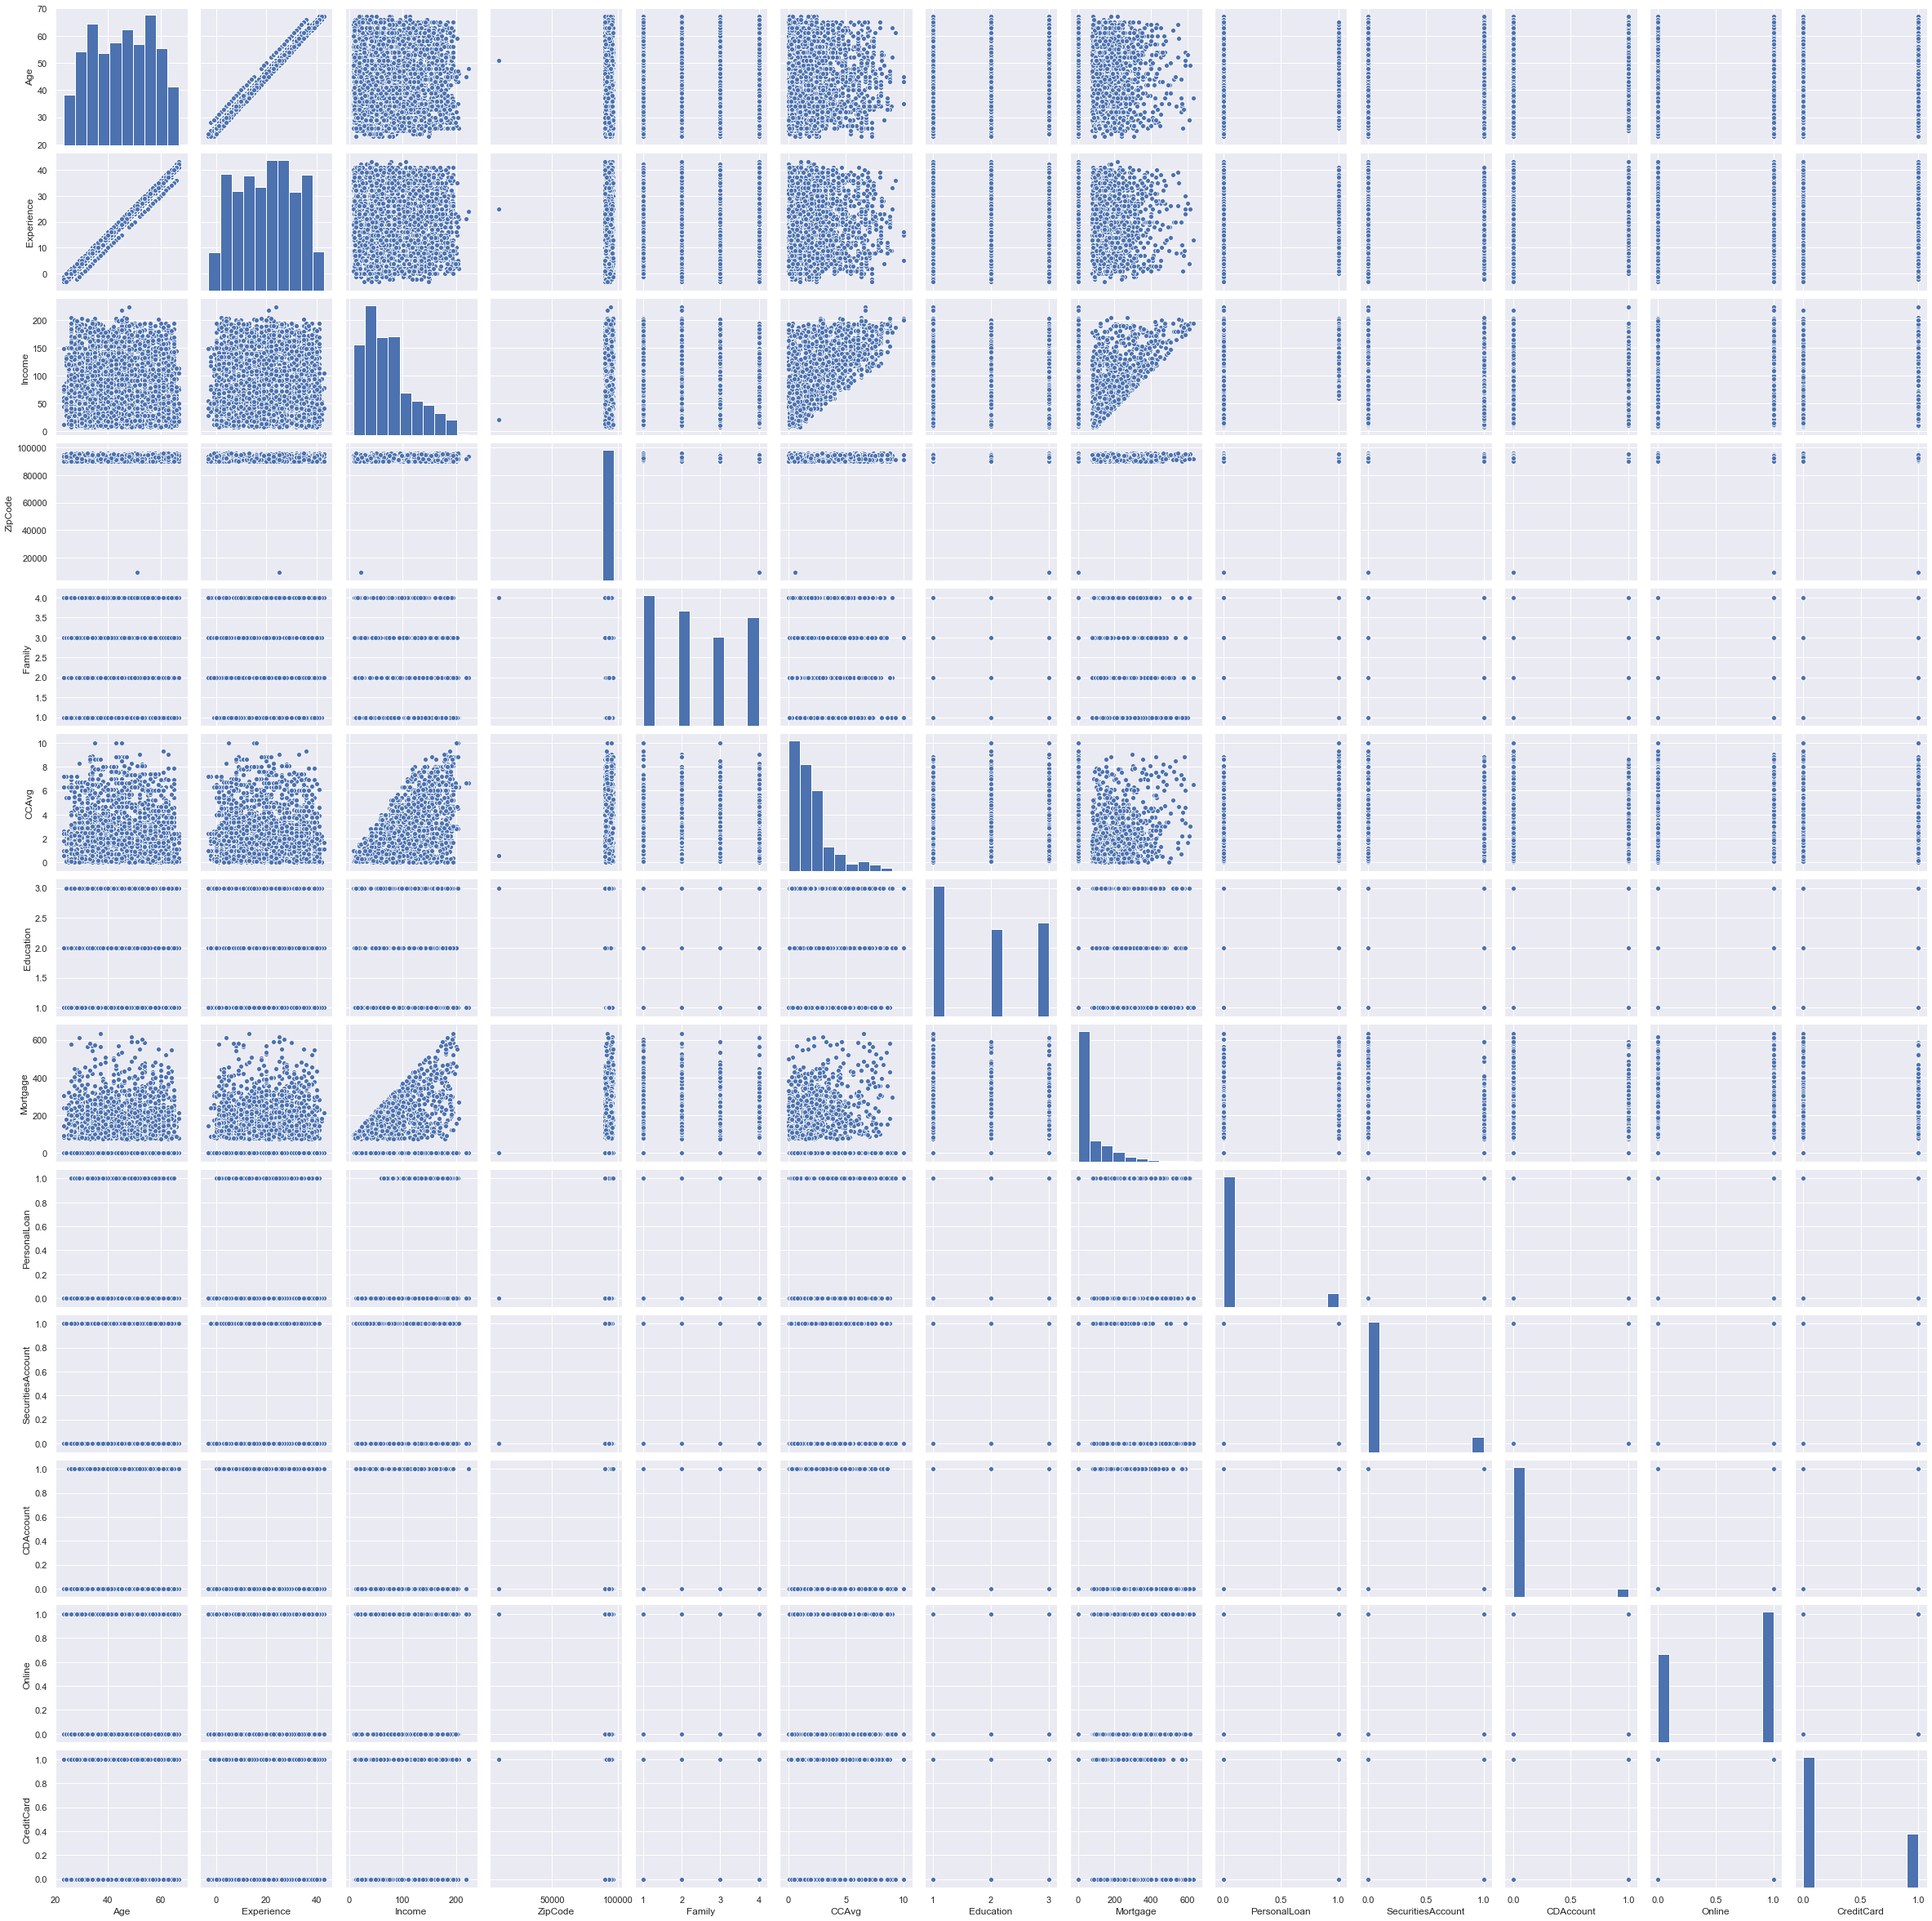

In [31]:
#Pairplots of all variables
sns.pairplot(data)


In [143]:
# Mean of each numeric group broken down into whether or not they take a personal loan
data.groupby(['PersonalLoan']).mean()

,Age,Income,ZipCode,Family,CCAvg,Education,Mortgage
PersonalLoan,,,,,,,
0,45.367257,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381
1,45.066667,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833


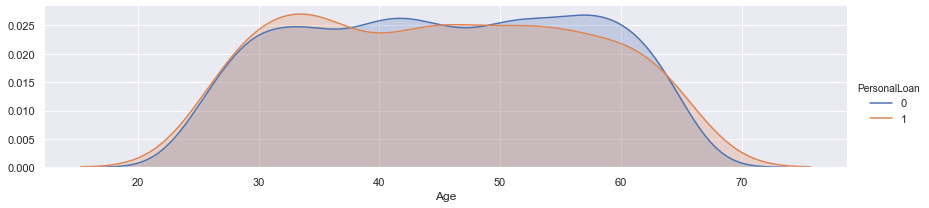

In [32]:
# Facet grid plots comparing variables colored by whether they accepted the loan or not
fig = sns.FacetGrid(data,hue='PersonalLoan',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
fig.add_legend()

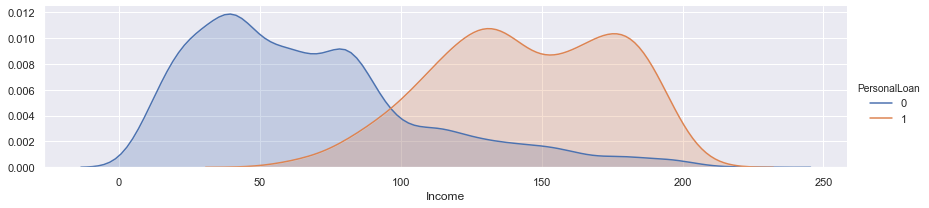

In [33]:
fig = sns.FacetGrid(data,hue='PersonalLoan',aspect=4)
fig.map(sns.kdeplot,'Income',shade=True)
fig.add_legend()

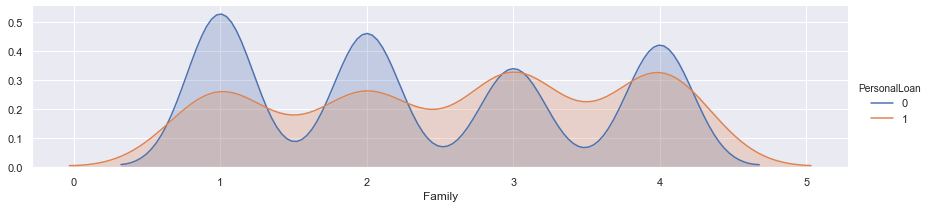

In [34]:
fig = sns.FacetGrid(data,hue='PersonalLoan',aspect=4)
fig.map(sns.kdeplot,'Family',shade=True)
fig.add_legend()

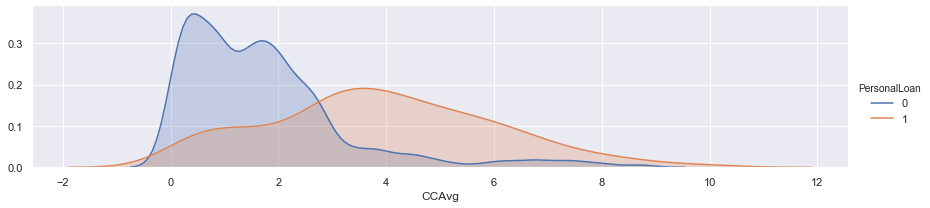

In [35]:
fig = sns.FacetGrid(data,hue='PersonalLoan',aspect=4)
fig.map(sns.kdeplot,'CCAvg',shade=True)
fig.add_legend()

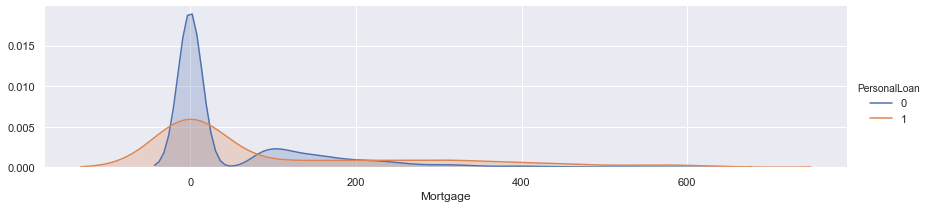

In [36]:
fig = sns.FacetGrid(data,hue='PersonalLoan',aspect=4)
fig.map(sns.kdeplot,'Mortgage',shade=True)
fig.add_legend()

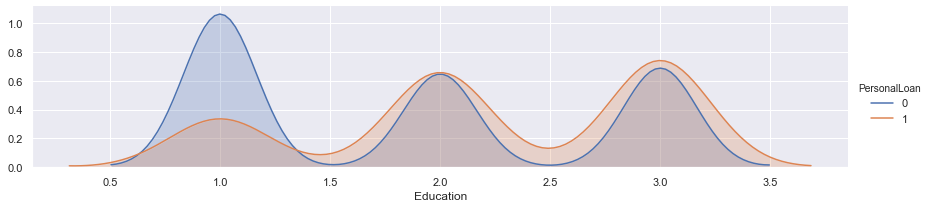

In [37]:
fig = sns.FacetGrid(data,hue='PersonalLoan',aspect=4)
fig.map(sns.kdeplot,'Education',shade=True)
fig.add_legend()

In [38]:
data2 = pd.read_csv('loan.csv')  

In [169]:
data2.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


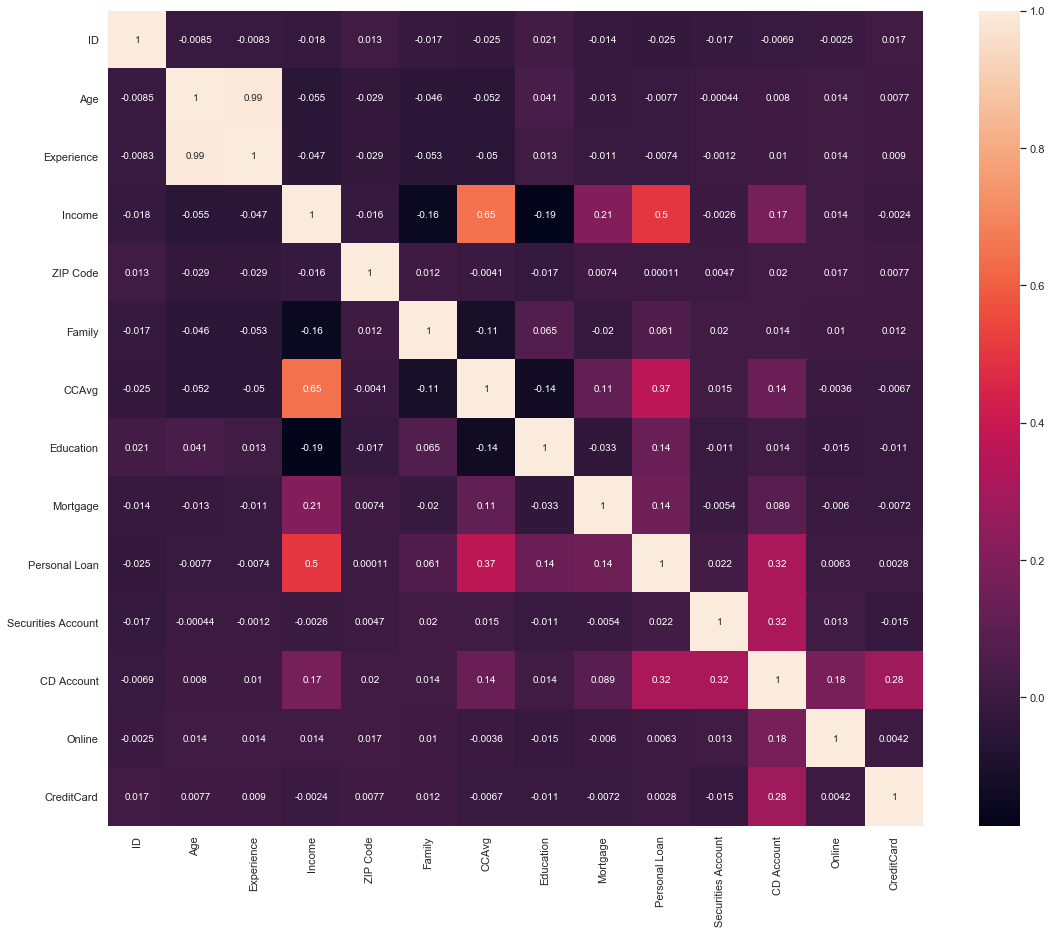

In [170]:
plt.subplots(figsize=(20,15))
sns.heatmap(data2.corr(),annot=True,square=True)

In [109]:
# creating response and predictor variable groups
x2 = data.drop('PersonalLoan',axis=1)
y = data['PersonalLoan']

In [110]:
# checking for correlation between variables
VF = data2.assign(const=1)
pd.Series([variance_inflation_factor(VF.values, i) 
               for i in range(VF.shape[1])], 
              index=VF.columns)

ID                       1.002785
Age                     93.761585
Experience              93.675381
Income                   2.218957
ZIP Code                 1.002853
Family                   1.061871
CCAvg                    1.737660
Education                1.199977
Mortgage                 1.052283
Personal Loan            1.630025
Securities Account       1.143850
CD Account               1.445879
Online                   1.042952
CreditCard               1.116111
const                 2405.094625
dtype: float64

In [111]:
# Dropping experience column due to high correlation with age
x2.drop(['Experience'], axis=1, inplace=True)

In [112]:
x2 = pd.get_dummies(x, drop_first=True)
x2.dtypes

Age                      int64
Income                   int64
ZipCode                  int64
Family                   int64
CCAvg                  float64
Education                int64
Mortgage                 int64
SecuritiesAccount_1      uint8
CDAccount_1              uint8
Online_1                 uint8
CreditCard_1             uint8
dtype: object

In [120]:
# One-hot encoding for family and education
df_dummies= pd.get_dummies(x2, prefix='Family', columns=['Family'])

In [121]:
x = pd.get_dummies(df_dummies, prefix='Education', columns=['Education'])

In [122]:
x.head()

,Age,Income,ZipCode,CCAvg,Mortgage,SecuritiesAccount_1,CDAccount_1,Online_1,CreditCard_1,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,25,49,91107,1.6,0,1,0,0,0,0,0,0,1,1,0,0
1,45,34,90089,1.5,0,1,0,0,0,0,0,1,0,1,0,0
2,39,11,94720,1.0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,100,94112,2.7,0,0,0,0,0,1,0,0,0,0,1,0
4,35,45,91330,1.0,0,0,0,0,1,0,0,0,1,0,1,0


In [123]:
print()
print()
print()

>-->**Logistic regression without normalization:**

**Splitting the data into a training and testing set in the ratio of 70:30 respectively:**

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=7)

In [125]:
logreg = LogisticRegression()

In [126]:
logreg.fit(x_train, y_train)  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
y_predict = logreg.predict(x_test)  

In [128]:
z = x_test.copy()
z['ObservedPLS'] = y_test
z['PredictedPLS'] = y_predict
z.head()

,Age,Income,ZipCode,CCAvg,Mortgage,SecuritiesAccount_1,CDAccount_1,Online_1,CreditCard_1,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,ObservedPLS,PredictedPLS
3406,42,34,92177,2.0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
757,52,81,91745,1.8,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3624,58,70,92028,1.4,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4544,28,80,95819,2.5,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3235,60,39,91711,1.6,0,0,0,1,0,0,1,0,0,0,0,1,0,0


Rows of the test data where the predicted class is not equal to the observed class:

In [129]:
dequals = z.loc[z['ObservedPLS'] != z['PredictedPLS']]

In [130]:
dequals.head()

,Age,Income,ZipCode,CCAvg,Mortgage,SecuritiesAccount_1,CDAccount_1,Online_1,CreditCard_1,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,ObservedPLS,PredictedPLS
4301,49,130,92677,1.1,281,0,1,1,0,0,0,0,1,1,0,0,1,0
4575,53,115,90095,0.5,0,0,0,0,0,0,1,0,0,0,0,1,1,0
2061,63,159,93950,4.9,111,0,0,0,0,0,0,0,1,0,1,0,1,0
2261,30,150,94305,5.0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
78,54,133,93305,2.6,0,0,0,0,0,0,1,0,0,0,0,1,1,0


In [131]:
data4 = z.loc[z['ObservedPLS'] != z['PredictedPLS']]

In [132]:
# Number of rows where observed does not equal predicted
print(data4['ObservedPLS'].count())

127


In [133]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Confusion Matrix:


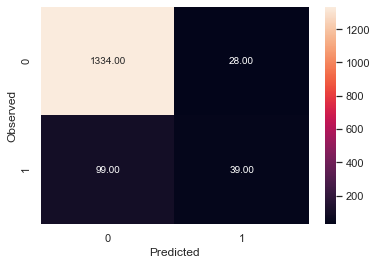

None

Training accuracy:
0.9042857142857142

Testing accuracy:
0.9153333333333333

Recall:
0.2826086956521739

Precision:
0.582089552238806

F1 Score:
0.38048780487804873

Roc Auc Score:
0.6310253463576582



In [134]:
print('Confusion Matrix:')
print(draw_cm(y_test,y_predict))
print()

print("Training accuracy:")
print(logreg.score(x_train,y_train))  
print()

print("Testing accuracy:")
print(logreg.score(x_test, y_test))
print()

print("Recall:")
print(recall_score(y_test,y_predict))
print()

print("Precision:")
print(precision_score(y_test,y_predict))
print()

print("F1 Score:")
print(f1_score(y_test,y_predict))
print()

print("Roc Auc Score:")
print(roc_auc_score(y_test,y_predict))
print()

In [135]:
fi = pd.DataFrame()
fi['Col'] = x_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),4)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
1,Income,0.0346
3,CCAvg,0.0010
4,Mortgage,0.0009
13,Education_1,0.0002
0,Age,0.0001
2,ZipCode,0.0001
6,CDAccount_1,0.0001
14,Education_2,0.0001
15,Education_3,0.0001
5,SecuritiesAccount_1,0.0000


In [136]:
#logit_model=sm.Logit(y,x)
#result=logit_model.fit()
#print(result.summary2())

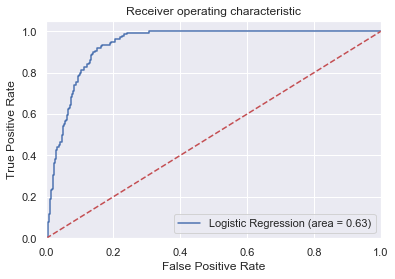

In [137]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [138]:
print()
print()
print()

>--->**Logistic regression with normalization:**

In [139]:
col_names = data.columns

In [140]:
scaler = StandardScaler()

In [141]:
scaled_x = scaler.fit_transform(x)
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

In [142]:
logreg2 = LogisticRegression()
logreg2.fit(scaled_x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
y_pred2 = logreg2.predict(scaled_x_test)

Confusion Matrix:


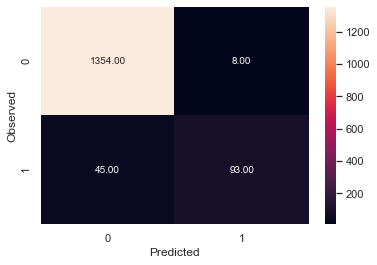

None

Training accuracy:
0.9585714285714285

Testing accuracy:
0.9646666666666667

Recall:
0.6739130434782609

Precision:
0.9207920792079208

F1 Score:
0.7782426778242678

Roc Auc Score:
0.8340196641767221



In [144]:
print('Confusion Matrix:')
print(draw_cm(y_test,y_pred2))
print()

print("Training accuracy:")
print(logreg2.score(scaled_x_train,y_train))  
print()

print("Testing accuracy:")
print(logreg2.score(scaled_x_test, y_test))
print()

print("Recall:")
print(recall_score(y_test,y_pred2))
print()

print("Precision:")
print(precision_score(y_test,y_pred2))
print()

print("F1 Score:")
print(f1_score(y_test,y_pred2))
print()

print("Roc Auc Score:")
print(roc_auc_score(y_test,y_pred2))
print()

In [145]:
fi2 = pd.DataFrame()
fi2['Col'] = x_train.columns
fi2['Coeff'] = np.round(abs(logreg2.coef_[0]),2)
fi2.sort_values(by='Coeff',ascending=False)

,Col,Coeff
1,Income,2.67
13,Education_1,1.14
6,CDAccount_1,0.80
15,Education_3,0.68
14,Education_2,0.57
11,Family_3,0.43
8,CreditCard_1,0.42
12,Family_4,0.41
10,Family_2,0.40
9,Family_1,0.39


In [146]:
#logit_model=sm.Logit(y,x)
#result=logit_model.fit()
#print(result.summary2())

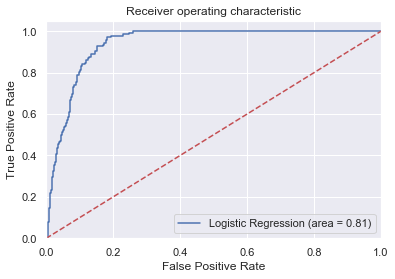

In [147]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(scaled_x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(scaled_x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [148]:
scaled_x = scaler.fit_transform(x)

In [149]:
print()
print()
print()

>---> **Comparing normalized versus non-normalized logistic regression results:**

**Confusion matrices:**

>---> Confusion Matrix without normalization:


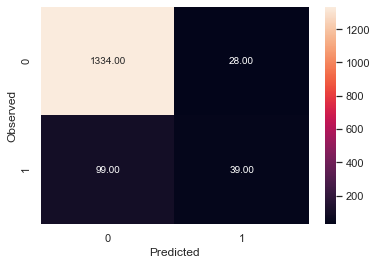

None

>---> Confusion Matrix with normalization:


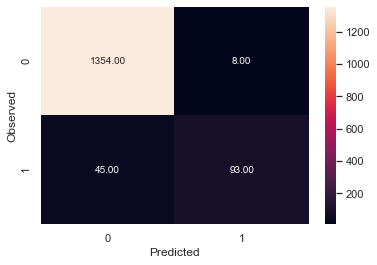

None



In [150]:
print('>---> Confusion Matrix without normalization:')
print(draw_cm(y_test,y_predict))
print()

print('>---> Confusion Matrix with normalization:')
print(draw_cm(y_test,y_pred2))
print()


Find out coefficients of all the attributes and show the output in a data frame with column names:

**Coefficients (in descending order):**

In [151]:
fi = pd.DataFrame()
fi['Column'] = x_train.columns
fi['Coefficient'] = np.round(abs(logreg.coef_[0]),4)
fi.sort_values(by='Coefficient',ascending=False)

,Column,Coefficient
1,Income,0.0346
3,CCAvg,0.0010
4,Mortgage,0.0009
13,Education_1,0.0002
0,Age,0.0001
2,ZipCode,0.0001
6,CDAccount_1,0.0001
14,Education_2,0.0001
15,Education_3,0.0001
5,SecuritiesAccount_1,0.0000


In [152]:
fi2 = pd.DataFrame()
fi2['Column'] = x_train.columns
fi2['Coefficient'] = np.round(abs(logreg2.coef_[0]),2)
fi2.sort_values(by='Coefficient',ascending=False)

,Column,Coefficient
1,Income,2.67
13,Education_1,1.14
6,CDAccount_1,0.80
15,Education_3,0.68
14,Education_2,0.57
11,Family_3,0.43
8,CreditCard_1,0.42
12,Family_4,0.41
10,Family_2,0.40
9,Family_1,0.39


**ROC curve:**

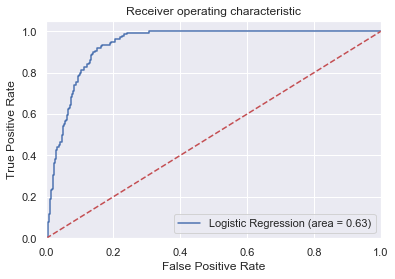

In [153]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

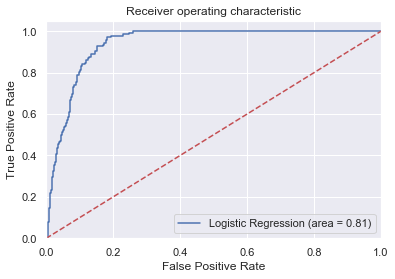

In [154]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(scaled_x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(scaled_x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [155]:
print('Training accuracy without normalization:', logreg.score(x_train,y_train))
print('>---> Training accuracy with normalization:', logreg2.score(scaled_x_train,y_train))
print()


print('Testing accuracy without normalization:', logreg.score(x_test, y_test))
print('>---> Testing accuracy with normalization:', logreg2.score(scaled_x_test, y_test))
print()

print('Recall without normalization:', recall_score(y_test,y_predict))
print('>---> Recall with normalization:', recall_score(y_test,y_pred2))
print()


print('Precision without normalization:', precision_score(y_test,y_predict))
print('>---> Precision with normalization:', precision_score(y_test,y_pred2))
print()

print('F1 without normalization:', f1_score(y_test,y_predict))
print('>---> F1 with normalization:', f1_score(y_test,y_pred2))
print()


print('ROC AUC Score without normalization:', roc_auc_score(y_test,y_predict))
print('>---> ROC AUC Score with normalization:', roc_auc_score(y_test,y_pred2))
print()

Training accuracy without normalization: 0.9042857142857142
>---> Training accuracy with normalization: 0.9585714285714285

Testing accuracy without normalization: 0.9153333333333333
>---> Testing accuracy with normalization: 0.9646666666666667

Recall without normalization: 0.2826086956521739
>---> Recall with normalization: 0.6739130434782609

Precision without normalization: 0.582089552238806
>---> Precision with normalization: 0.9207920792079208

F1 without normalization: 0.38048780487804873
>---> F1 with normalization: 0.7782426778242678

ROC AUC Score without normalization: 0.6310253463576582
>---> ROC AUC Score with normalization: 0.8340196641767221



**Insight: all barometers of the fit of the logistic regression model improve with normalization.**

Business Insights:

**Confusion matrix:**

-True Positive (observed=1,predicted=1):
Correctly predicted that a person will take a personal loan.  The normalized logistic regression model sorted 93 people into this group, which constituted 6.2% of the test group.

-False Positive (observed=0,predicted=1):
Predicted that a person will take a personal loan, but they did not.  The normalized logistic regression model sorted 20 people into this group, which constituted 0.53
% of the test group.

-True Negative (observed=0,predicted=0):
Correctly predicted that a person will not take a personal loan.  The normalized logistic regression model sorted 1354 people into this group, which constituted 90% of the test group.

-False Negative (observed=1,predicted=0):
Predicted that a person will not take a personal loan, but they did.  The normalized logistic regression model sorted 49 people into this group, which constituted 3% of the test group.

**-Important Features to the model:**

-> Income	

-> Education

-> CDAccount

-> Family	

-> CreditCard

These seem to be top 5 features which influence the model's output based on the coefficients value.


**-Features which don't help the model:**

-> Mortgage	

-> ZipCode

-> Age

These have coefficients close to 0 so these features don't help the model in predicting the target variable.

The bank can use this information to help design their advertising campaigns in such a way that variables identified as important through high coefficients can be focused on more.  For example, since income seems to have a high relationship to whether or not a person takes a personal loan, advertising could be focused in higher income housing areas.